In [30]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [31]:
!nvidia-smi

Tue Dec 23 05:11:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             33W /   70W |     120MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [33]:
data_train_path = "/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/train"
data_train_test = "/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/test"
data_train_val = "/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/validation"


In [34]:
img_width = 180
img_height = 180


In [35]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split= False
)

Found 3115 files belonging to 36 classes.


In [36]:
data_category =data_train.class_names

In [37]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_val,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split= False
)

Found 351 files belonging to 36 classes.


In [38]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_test,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split= False
)

Found 359 files belonging to 36 classes.


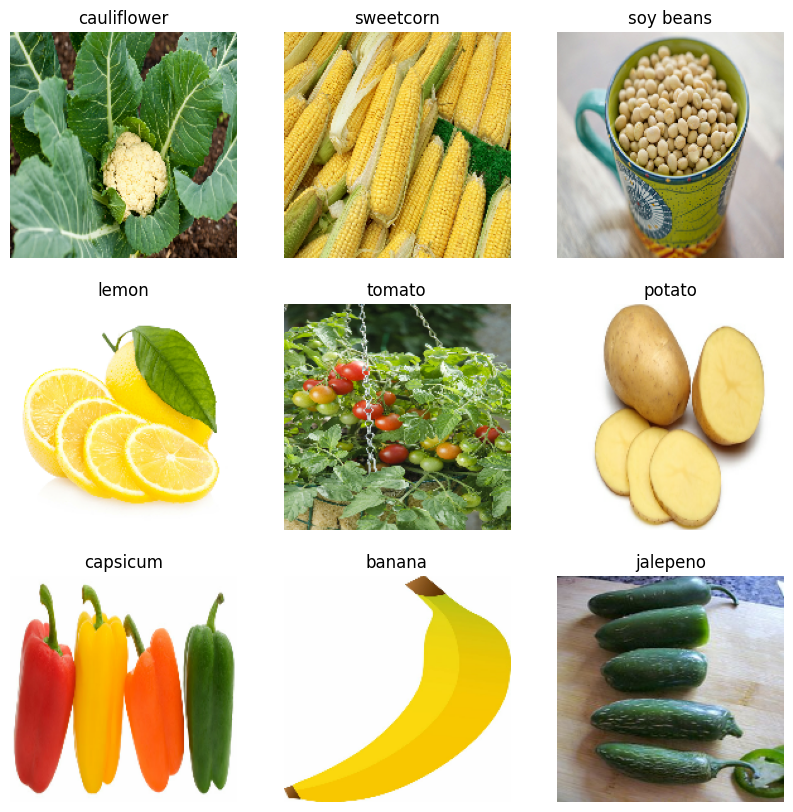

In [39]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(data_category[labels[i]])
    plt.axis("off")

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [41]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= "same", activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= "same", activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
epochs_size = 25
history = model.fit(data_train, validation_data= data_val, epochs= epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 616s 6s/step - accuracy: 0.0467 - loss: 3.9089 - val_accuracy: 0.2707 - val_loss: 2.6711
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 673ms/step - accuracy: 0.2641 - loss: 2.6854 - val_accuracy: 0.6068 - val_loss: 1.6317
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 646ms/step - accuracy: 0.4696 - loss: 1.8981 - val_accuracy: 0.7863 - val_loss: 0.8403
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 652ms/step - accuracy: 0.6689 - loss: 1.1658 - val_accuracy: 0.8860 - val_loss: 0.5529
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 640ms/step - accuracy: 0.8227 - loss: 0.6792 - val_accuracy: 0.9145 - val_loss: 0.4167
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 650ms/step - accuracy: 0.8594 - loss: 0.5543 - val_accuracy: 0.9088 - val_loss: 0.7338
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 670ms/step - accuracy: 0.9183 - loss: 0.4026 - val_accuracy: 0.9516 - val_loss: 0.4185
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 639ms/step - accuracy: 0.9315 - loss: 0.3106 - val_accura

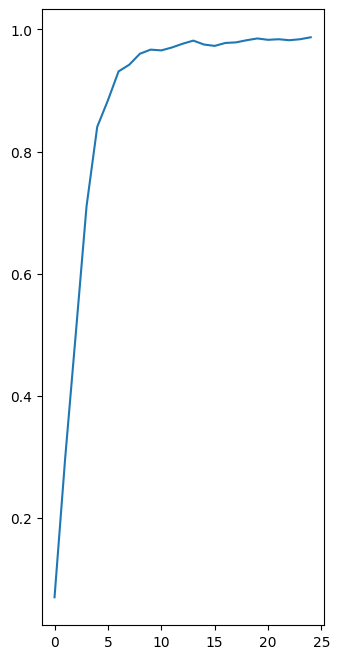

In [44]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')

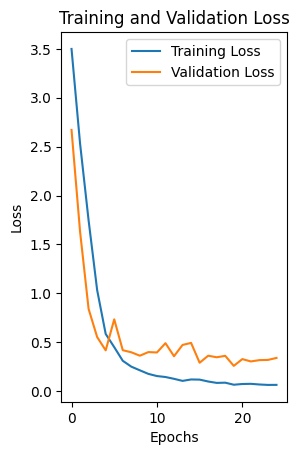

In [45]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
image = "/content/istockphoto-673162168-612x612.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
input_arr = tf.keras.utils.img_to_array(image)
img_bat = np.expand_dims(input_arr, axis=0)
predictions = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [67]:
score = tf.nn.softmax(predictions[0])
print(f"Veg/Fruit in image is {data_category[np.argmax(score)]} with accuracy of {np.max(score)*100}")

Veg/Fruit in image is cabbage with accuracy of 99.62947082519531


In [68]:
model.save('image_classify.keras')